# Empathic Art EDA 

By Mickey Krekels

## Loading imports

In [151]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# import plotly
import plotly.express as px

# import os 
from os import listdir
from os.path import isfile, join

# import librosa
import cv2
import librosa
import librosa.display

# import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# import PIL 
# this is needed for loading large images dataset 
import PIL 
import pathlib
import shutil

# import datetime
from datetime import datetime

#import os
import os



# Loading data
Dataset:
[Toronto emotional speech set (TESS) - Older talker_Happy](https://tspace.library.utoronto.ca/handle/1807/24501)<br>
Author:<br>
Dupuis, Kate; Pichora-Fuller, M. Kathleen

In [98]:
mypath = './data'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles[:5]

['OAF_back_angry.png',
 'OAF_back_angry.wav',
 'OAF_back_disgust.png',
 'OAF_back_disgust.wav',
 'OAF_back_fear.png']

In [99]:
names = []
for file in onlyfiles:
    if(file.endswith('.wav')):
        names.append(file.split('.')[0])
names[:5]

['OAF_back_angry',
 'OAF_back_disgust',
 'OAF_back_fear',
 'OAF_back_happy',
 'OAF_back_neutral']

In [100]:
paths = []

for file in onlyfiles:
    if(file.endswith('.wav')):
        paths.append(mypath + "/" + file)

paths[:5]

['./data/OAF_back_angry.wav',
 './data/OAF_back_disgust.wav',
 './data/OAF_back_fear.wav',
 './data/OAF_back_happy.wav',
 './data/OAF_back_neutral.wav']

In [101]:
labels = []

for file in onlyfiles:
    if(file.endswith('.wav')):
        only_name = file.split('.')[0]
        label = only_name.split('_')[2]
        labels.append(label)
    
labels[:5]

['angry', 'disgust', 'fear', 'happy', 'neutral']

In [102]:
df = pd.DataFrame({'path': paths, 'name': names, 'label': labels})
df.head()

,path,name,label
0,./data/OAF_back_angry.wav,OAF_back_angry,angry
1,./data/OAF_back_disgust.wav,OAF_back_disgust,disgust
2,./data/OAF_back_fear.wav,OAF_back_fear,fear
3,./data/OAF_back_happy.wav,OAF_back_happy,happy
4,./data/OAF_back_neutral.wav,OAF_back_neutral,neutral


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2800 non-null   object
 1   name    2800 non-null   object
 2   label   2800 non-null   object
dtypes: object(3)
memory usage: 65.8+ KB


Saving the dataframe to a csv format 

In [104]:
df.to_csv(mypath + "/" +"Toronto_emotional_speech.csv", index=False)

## Inspecting the sound files 

In [105]:
df.describe()

,path,name,label
count,2800,2800,2800
unique,2800,2800,7
top,./data/OAF_back_angry.wav,OAF_back_angry,angry
freq,1,1,400


The total split of the dataset is divided equally, each of the label types has an amount of 400 rows of data. 

In [106]:
emotion_types = df['label'].unique()
unique_count = df['label'].value_counts()

In [107]:
fig = px.bar(df, x=emotion_types, y=unique_count)
fig.show()

In [108]:
x, sr = librosa.load(df.path[0], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(67872,) 44100


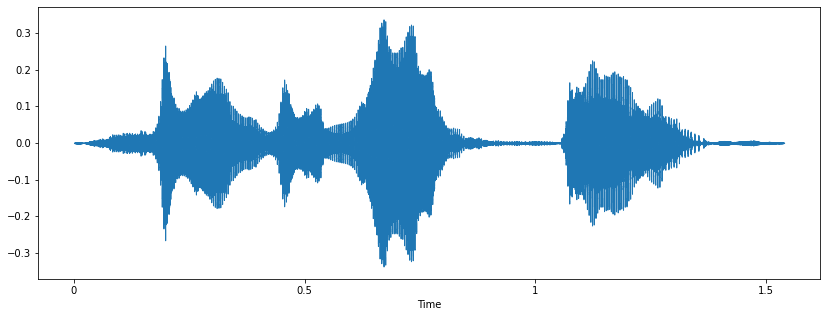

In [109]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

Converting the sound file to a spectrogram

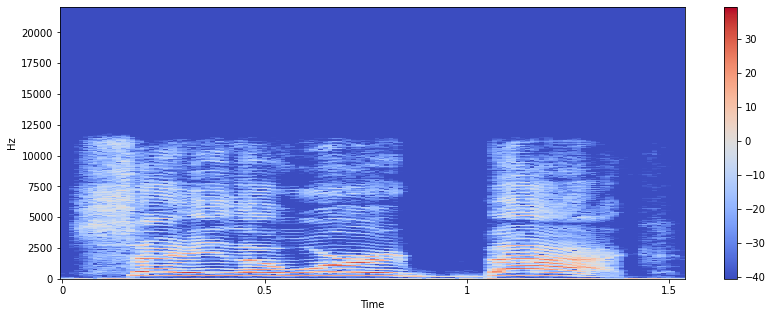

In [110]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Converting the spectrogram to a mel-spectrogram

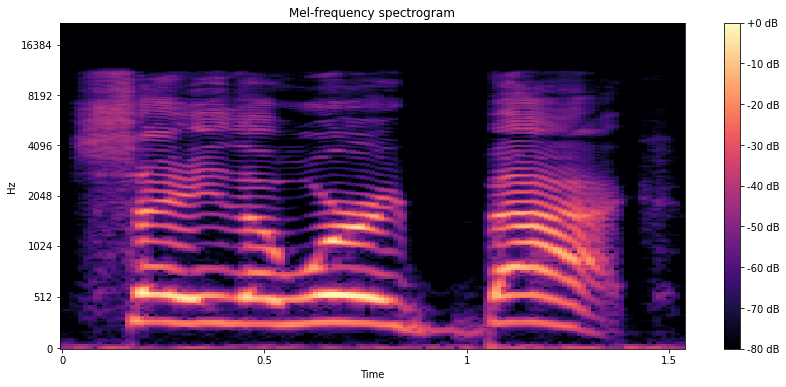

In [111]:
melspectrum = librosa.feature.melspectrogram(y=x, sr=sr, hop_length= 512, window='hann', n_mels=256)
fig, ax = plt.subplots()
fig.set_size_inches(14,6)

S_dB = librosa.power_to_db(melspectrum, ref=np.max)

img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')
plt.show()

## Converting all audio files to Mel Spectrograms
this for loop converts all of the audio files in to Mel Spectrograms, and saves them locally.

In [112]:
# -----Curently disiabled because of high duration when restarting nodebook----- #

# for index, row in df.iterrows():
#     # load audio file
#     x, sr = librosa.load(row.path, sr=44100)
#     # compute mel-spectrogram
#     melspectrum = librosa.feature.melspectrogram(y=x, sr=sr, hop_length= 512, window='hann', n_mels=256)
#     # convert to decibels
#     S_dB = librosa.power_to_db(melspectrum, ref=np.max)
#     # convert plot to image
#     img = librosa.display.specshow(S_dB)
#     # save image to disk
#     img.figure.savefig(mypath + "/"+ row['name'] +'.png')

reload the new items in the listed directory

In [113]:
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
spectrogram_paths = []

for file in onlyfiles:
    if(file.endswith('.png')):
        spectrogram_paths.append(mypath + "/" + file)

spectrogram_paths[:5]

['./data/OAF_back_angry.png',
 './data/OAF_back_disgust.png',
 './data/OAF_back_fear.png',
 './data/OAF_back_happy.png',
 './data/OAF_back_neutral.png']

Creating a new dataframe

In [114]:
df = pd.DataFrame({'sound_path': paths,'spectrogram_path': spectrogram_paths, 'name': names, 'label': labels})
df.head()

,sound_path,spectrogram_path,name,label
0,./data/OAF_back_angry.wav,./data/OAF_back_angry.png,OAF_back_angry,angry
1,./data/OAF_back_disgust.wav,./data/OAF_back_disgust.png,OAF_back_disgust,disgust
2,./data/OAF_back_fear.wav,./data/OAF_back_fear.png,OAF_back_fear,fear
3,./data/OAF_back_happy.wav,./data/OAF_back_happy.png,OAF_back_happy,happy
4,./data/OAF_back_neutral.wav,./data/OAF_back_neutral.png,OAF_back_neutral,neutral


The shape of the generated images is **(288, 432, 3)**.

In [115]:
image_size = cv2.imread(df.spectrogram_path[0]).shape
image_size

(288, 432, 3)

loading the images into memory for training and testing the network

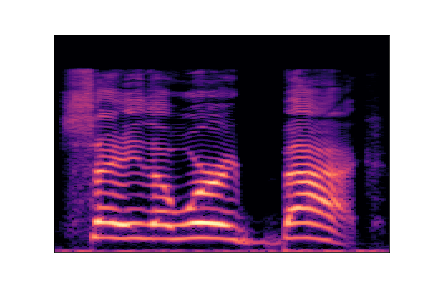

In [116]:
# images = []
data_dir = pathlib.Path(mypath + "/")
images = list(data_dir.glob('*.png'))
PIL.Image.open(str(images[0]))

creating a test and train set CNN model (split of 80:20)

In [118]:
train = df[:int(len(df)*0.8)]
test  = df[int(len(df)*0.8):]

In [119]:
def df_to_tensorflow_dataset(copy_dir,df,labels):
    dfs = []

    for label in labels:
        dfs.append(df[df['label'] == label])

    for df_split in dfs:

        for index, row in df_split.iterrows():
            label = row['label']
            path = row['spectrogram_path']
            shutil.copy(path, copy_dir + label + "/")
            

In [120]:
# -----Curently disiabled because of high duration when restarting nodebook----- #

# df_to_tensorflow_dataset('input/training/training/',train,labels)
# df_to_tensorflow_dataset('input/validation/validation/',test,labels)

In [125]:
data_dir = pathlib.Path('input/training/training/')

batch_size = 32
img_height = image_size[0]
img_width = image_size[1]

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2240 files belonging to 7 classes.
Using 1792 files for training.


In [126]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2240 files belonging to 7 classes.
Using 448 files for validation.


In [127]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'ps', 'sad']


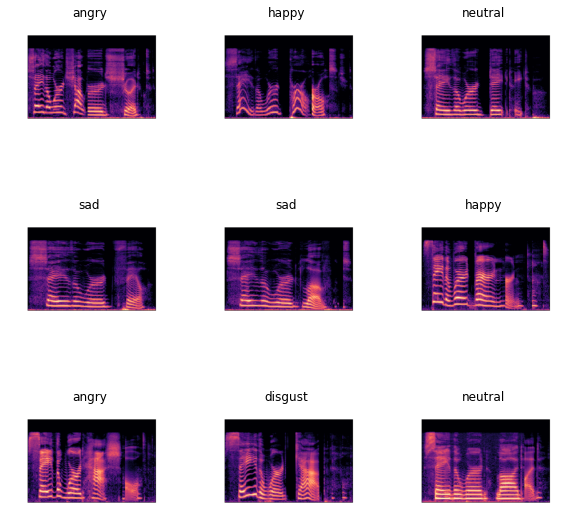

In [128]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [129]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 288, 432, 3)
(32,)


In [130]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [131]:
normalization_layer = layers.Rescaling(1./255)


In [134]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [135]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 288, 432, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 288, 432, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 144, 216, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 144, 216, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 72, 108, 32)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 108, 64)       18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 54, 64)       

In [136]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
56/56 [==============================] - 57s 1s/step - loss: 1.8482 - accuracy: 0.3660 - val_loss: 0.8725 - val_accuracy: 0.6674
Epoch 2/10
56/56 [==============================] - 59s 1s/step - loss: 0.4739 - accuracy: 0.8624 - val_loss: 0.1491 - val_accuracy: 0.9621
Epoch 3/10
56/56 [==============================] - 58s 1s/step - loss: 0.0546 - accuracy: 0.9865 - val_loss: 0.0899 - val_accuracy: 0.9688
Epoch 4/10
56/56 [==============================] - 54s 962ms/step - loss: 0.0145 - accuracy: 0.9972 - val_loss: 0.0324 - val_accuracy: 0.9911
Epoch 5/10
56/56 [==============================] - 54s 971ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 0.9955
Epoch 6/10
56/56 [==============================] - 54s 964ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0099 - val_accuracy: 0.9978
Epoch 7/10
56/56 [==============================] - 56s 1s/step - loss: 4.9318e-04 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 0.9978
Epoch 8

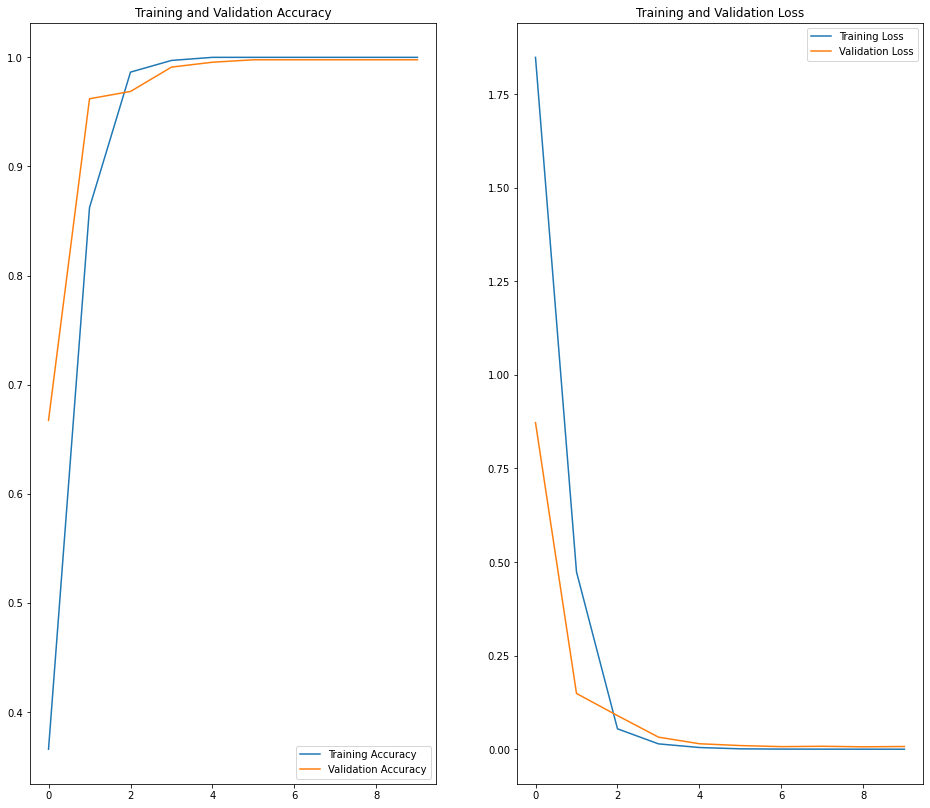

In [159]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 14))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving the model weights

In [154]:
save_name = 'weights_save/'
model.save(save_name)

INFO:tensorflow:Assets written to: weights_save/assets


save the model 

In [161]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model_save/model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\micke\AppData\Local\Temp\tmptv18g2wf\assets


INFO:tensorflow:Assets written to: C:\Users\micke\AppData\Local\Temp\tmptv18g2wf\assets
